# Graphing

This notebook contains code blocks that generate a few graphs, as I wanted to see the data, I will probably make this into a website in which one can upload their Spotify download and see a lot of this information.

Unfortunately, the Spotify API does not seem to allow me to view listen history, so people will need to download their data and upload it again.

## Setup

For any of these to work, you'll need to run the `index.mjs` file, to generate the `SongHistory.json` and `StreamingHistory.json`, which are both used here

```sh
node index.mjs
```

In [147]:
import json
from datetime import datetime

data = [];

with open('StreamingHistory.json', 'r') as f:
    data = json.loads(f.read())
    
for entry in data:
    entry['endTime'] = datetime.fromisoformat(entry['endTime'])

len(data)

30879

## Get by title

The following block graphs the listen history of a single song.

replace the `song` variable with the exact name of the song that you're looking for

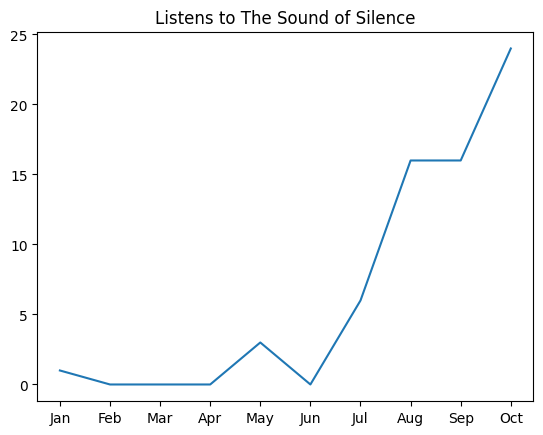

In [148]:
# Get by title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

song = 'The Sound of Silence' # Song title to look for

palette = plt.get_cmap('rainbow')
months = [0]*datetime.now().month
filtered_data = filter(lambda entry: entry['trackName'] == song, data)

for entry in filtered_data:
    months[entry['endTime'].month -1 ] += 1
    
df = pd.DataFrame({
    'x': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][:datetime.now().month],
    'y': months,
})

plt.title(f'Listens to {song}')
plt.plot(df['x'], df['y'])

## Get By Artist

This block will get songs by a specific artist.  Change the `artist` variable to the exact name of the artist, and the `threshold` variable to the minimum number of listens per year

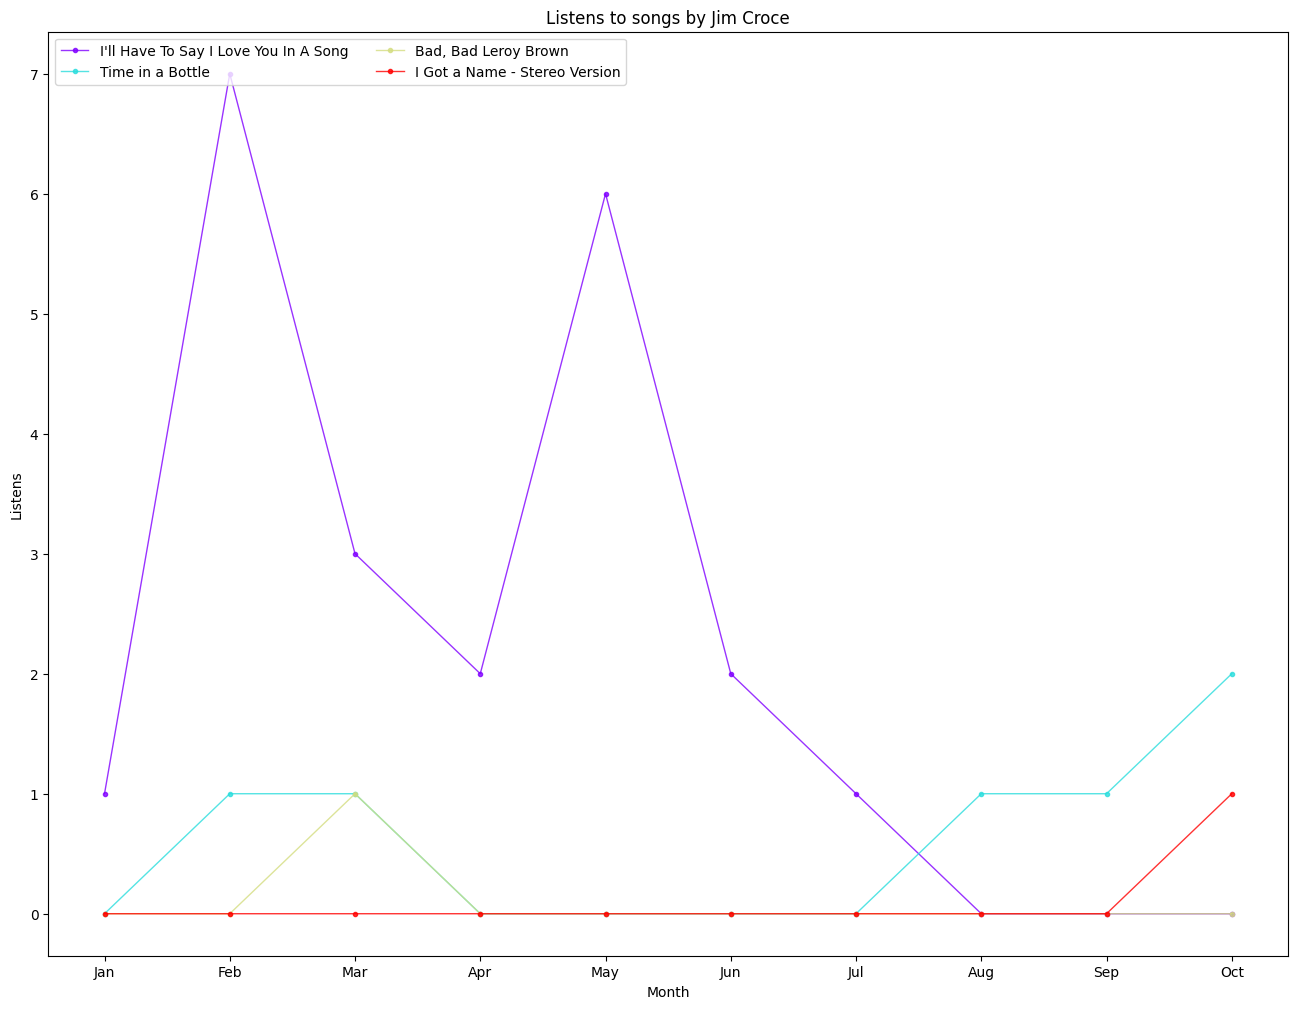

In [151]:
# Get by artist
artist = 'Jim Croce' # Artist to look for
threshold = 0 # Threshold of listens in total for a song to be counted

filtered_data = filter(lambda entry: entry['artistName'].lower() == artist.lower(), data)

songs_dict = {}
for entry in filtered_data:
    if entry['msPlayed'] < 5000: continue
    if entry['trackName'] not in songs_dict.keys():
        songs_dict[entry['trackName']] = [0] * datetime.now().month
    songs_dict[entry['trackName']][entry['endTime'].month - 1] += 1
    
songs_dict = dict(filter(lambda i: sum(i[1]) > threshold, songs_dict.items()))

df = pd.DataFrame({
    'x': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][:datetime.now().month],
    **songs_dict
    })

scale = 2
plt.figure(figsize=(8*scale,6*scale))

palette = plt.get_cmap('rainbow').resampled(len(songs_dict))
for i, column in enumerate(df.drop('x', axis=1)):
    plt.plot(df['x'], df[column], marker='.', color=palette(i), linewidth=1, alpha=0.8, label=column)
    
plt.legend(loc=2, ncol=2)
plt.title(f'Listens to songs by {artist}', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Listens')

plt.show()

## Get Top Songs

This block uses your spotify song listening data and gets the songs that you've listened to the most.

Change the `count` variable to the amount of songs that you want to get and the `offset` for the offset from the beginning of the list

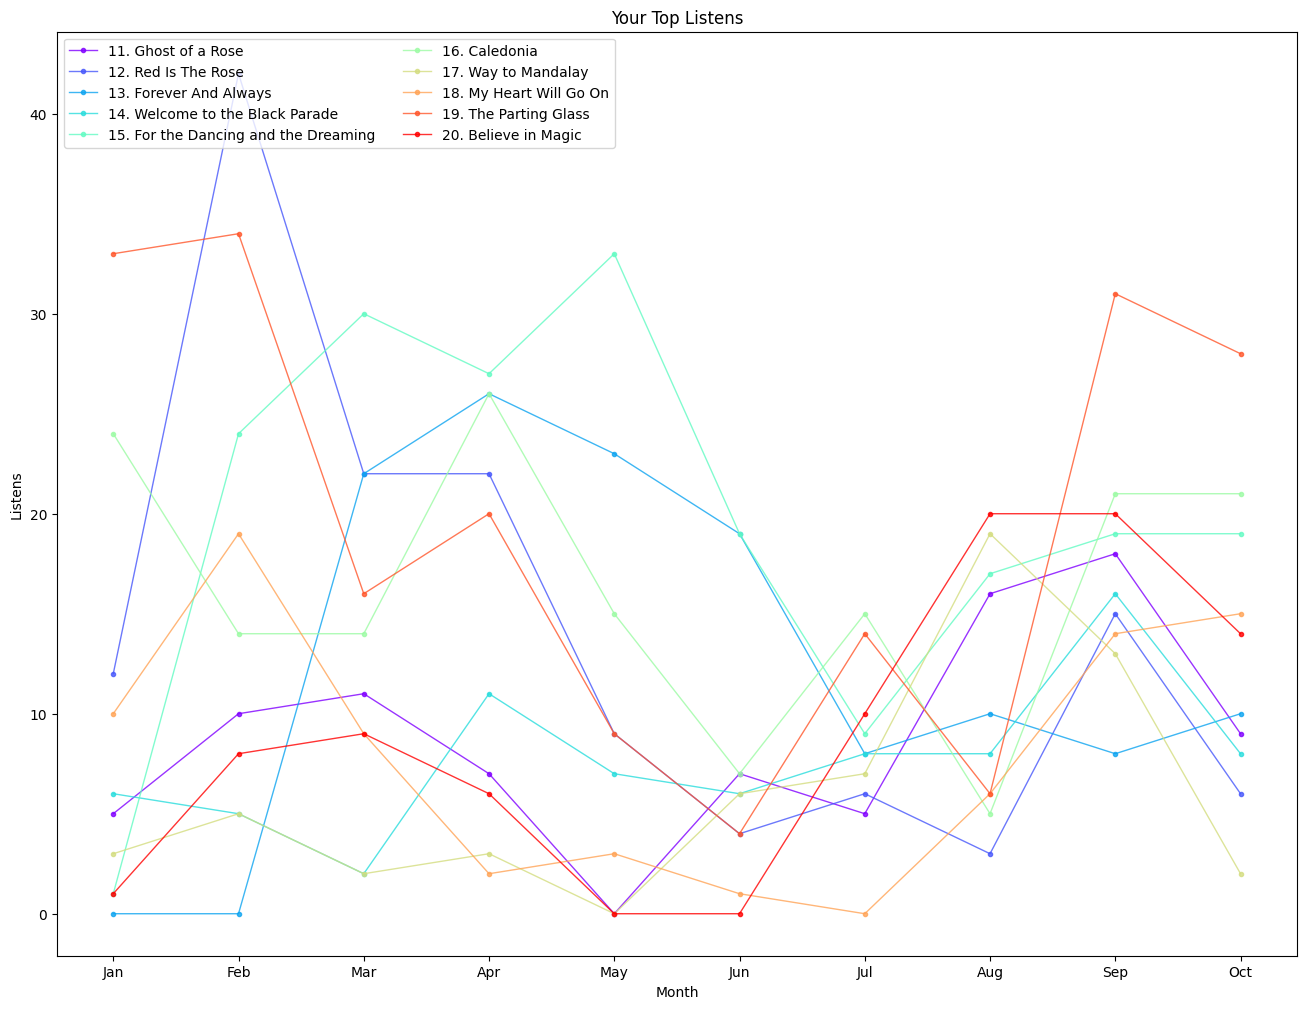

In [152]:
# Get top songs
count = 10 # Count of songs to get
offset = 0 # offset from the beginning

listen_data = []

with open('SongHistory.json', 'r') as f:
    listen_data = list(map(lambda e: e['title'], json.loads(f.read())[offset:offset+count]))
    
filtered_data = filter(lambda e: e['trackName'] in listen_data, data)

songs_dict = {}
for entry in filtered_data:
    if entry['trackName'] not in songs_dict.keys():
        songs_dict[entry['trackName']] = [0] * datetime.now().month
    songs_dict[entry['trackName']][entry['endTime'].month - 1] += 1

entries = list(map(lambda e: (str(listen_data.index(e[0]) + 1 + offset) + '. ' + e[0],e[1]), filter(lambda i: sum(i[1]) > threshold, songs_dict.items())))
entries.sort()
songs_dict = dict(entries)

df = pd.DataFrame({
    'x': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][:datetime.now().month],
    **songs_dict
})

palette = plt.get_cmap('rainbow').resampled(len(songs_dict))
plt.figure(figsize=(8*scale,6*scale))
for i, column in enumerate(df.drop('x', axis=1)):
    plt.plot(df['x'], df[column], marker='.', color=palette(i), linewidth=1, alpha=0.8, label=column)
    
plt.legend(loc=2, ncol=2)
plt.title("Your Top Listens", fontsize=12)
plt.xlabel("Month")
plt.ylabel("Listens")

plt.show()